In [1]:
import sys
sys.path.append('../..')

import numpy as np
from sklearn import datasets
import sklearn.ensemble
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt

import lime.lime_tabular
from density_lime.lime_tabular_manifold import LimeTabularExplainerManifold

In [2]:
data = datasets.load_iris()
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(data.data, data.target, train_size=0.80)
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

## Training a Model

In [3]:
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100)
rf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [4]:
print('Random Forest MSError: ', np.mean((rf.predict(x_test) - y_test) ** 2))
print('MSError when predicting the mean: ', np.mean((y_train.mean() - y_test) ** 2))

Random Forest MSError:  0.1
MSError when predicting the mean:  0.8025


## Explantion

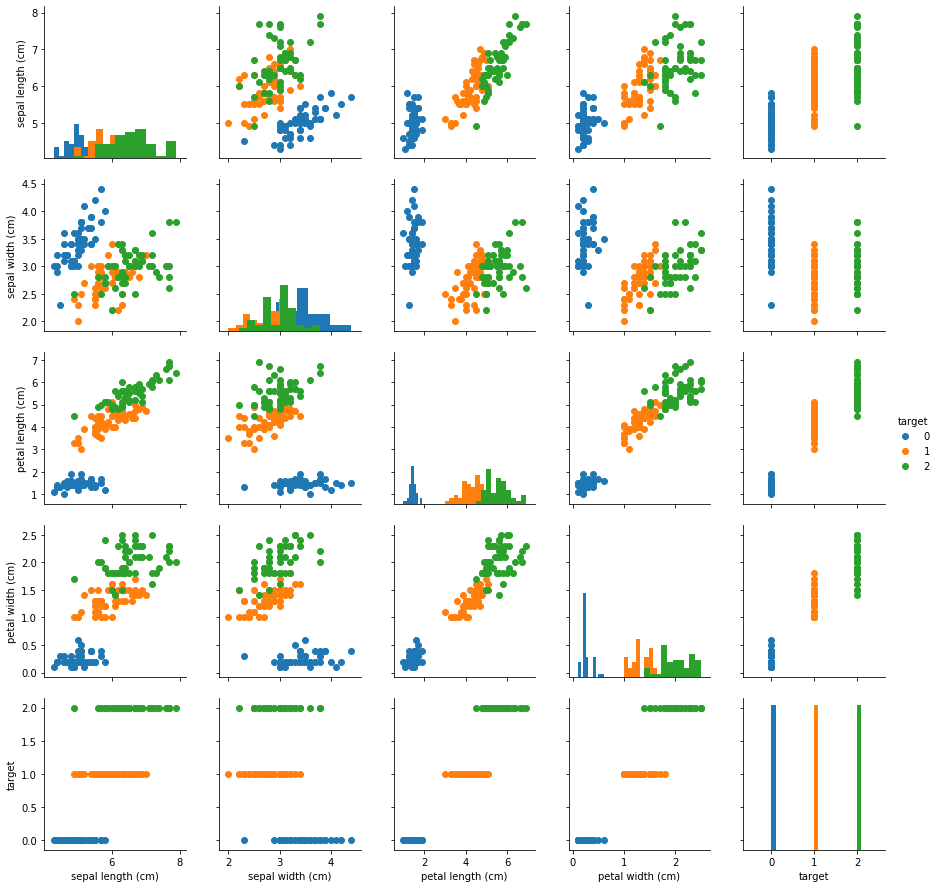

In [5]:
g = sns.PairGrid(df.sample(frac=1.0), hue='target') #, hue=12)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

In [6]:
categorical_features = []


In [7]:
i = 1
x_explain = x_test[i]
x_explain, y_test[i], rf.predict(x_explain.reshape(1, -1))

(array([4.7, 3.2, 1.6, 0.2]), 0, array([0]))

## Lime Standard Explantion

In [8]:
explainer = lime.lime_tabular.LimeTabularExplainer(x_train, feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

Parent:
mean  : [5.85833333 3.04       3.74833333 1.205     ]
scale : [0.79922706 0.41900676 1.72684603 0.75220232]


In [9]:
exp = explainer.explain_instance(x_explain, rf.predict_proba, num_features=4)

Intercept 0.4540883852257417
Prediction_local [0.47757687]
Right: 0.0


In [10]:
exp.show_in_notebook(show_table=True)

## Lime KDE Explantion

In [16]:
explainer_mani = LimeTabularExplainerManifold(x_train, sample_around_instance=True, manifold='kde', feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

Parent:
mean  : [5.85833333 3.04       3.74833333 1.205     ]
scale : [0.79922706 0.41900676 1.72684603 0.75220232]


In [17]:
exp_mani = explainer_mani.explain_instance_manifold(x_explain, rf.predict_proba, num_features=4)

Intercept -0.2450885763801438
Prediction_local [0.03866383]
Right: 0.0


In [18]:
exp_mani.show_in_notebook(show_table=True)

10
10
10


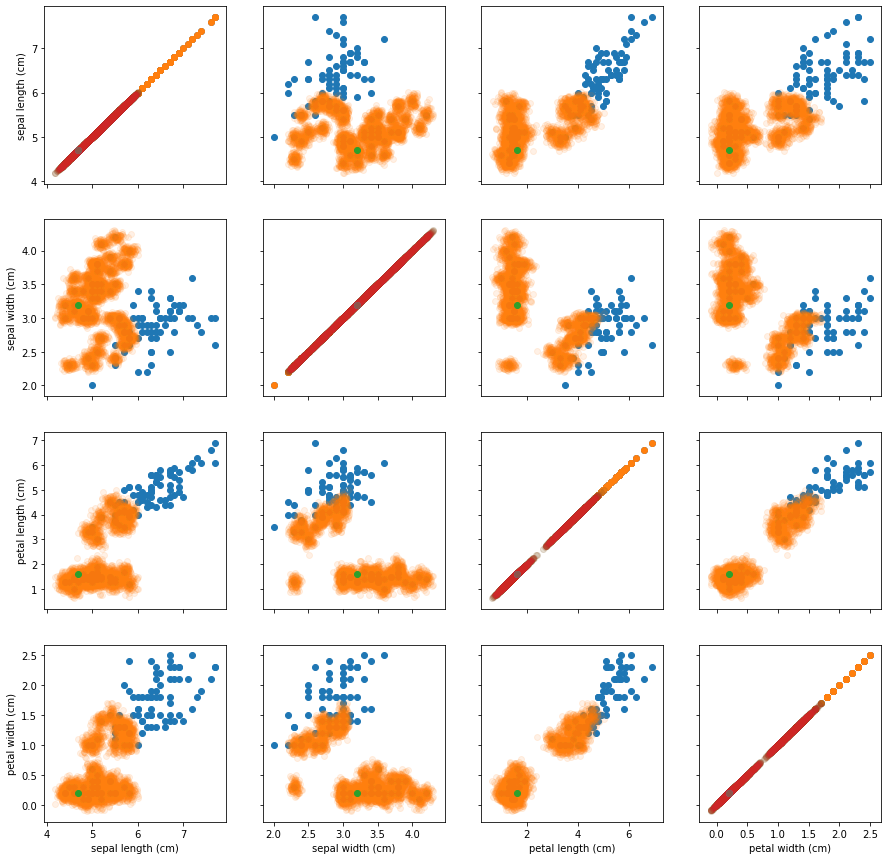

In [14]:
ax = explainer_mani.plot(x_train, figsize=(15, 15))
explainer_mani.plot_samples(ax)
explainer_mani.plot(x_explain.reshape(1, -1), ax)
plt.show()

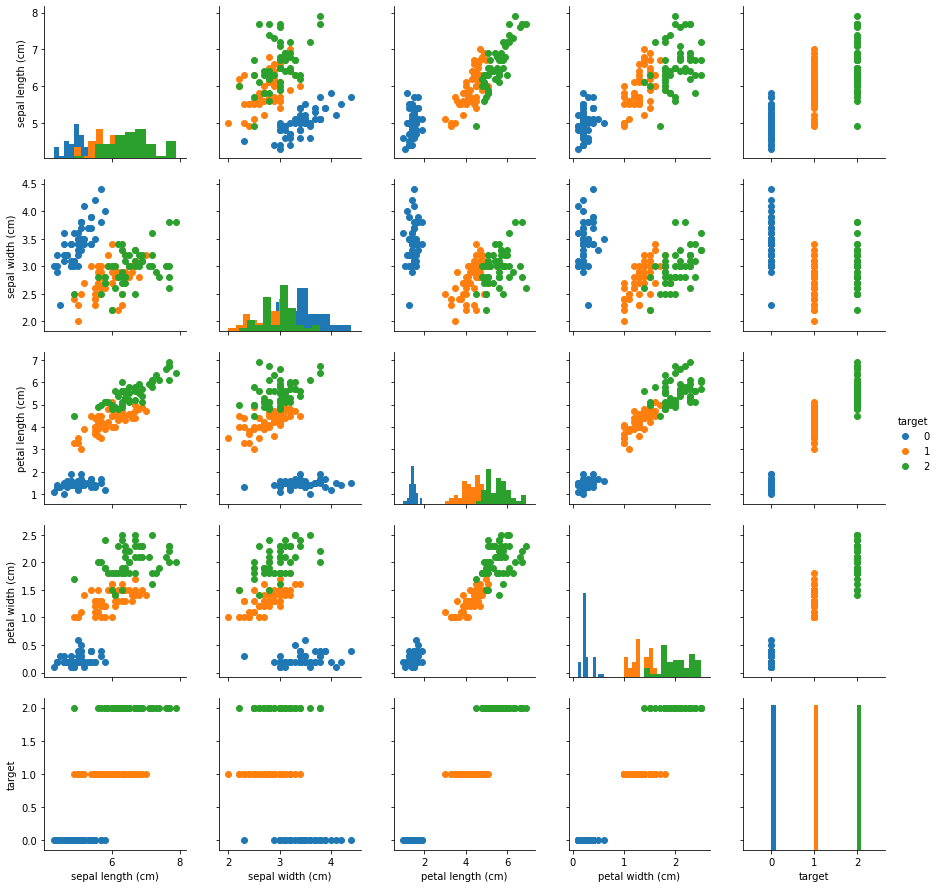

In [15]:
g = sns.PairGrid(df.sample(frac=1.0), hue='target') #, hue=12)
g = g.map_diag(plt.hist)
g = g.map_offdiag(plt.scatter)
g = g.add_legend()

## Lime KDE-PCA Explantion

In [19]:
explainer_mani = LimeTabularExplainerManifold(x_train, sample_around_instance=True, manifold='pca-kde', feature_names=data.feature_names, class_names=data.target_names, categorical_features=categorical_features, verbose=True, mode='classification')

Parent:
mean  : [5.85833333 3.04       3.74833333 1.205     ]
scale : [0.79922706 0.41900676 1.72684603 0.75220232]


In [20]:
exp_mani = explainer_mani.explain_instance_manifold(x_explain, rf.predict_proba, num_features=4)

AttributeError: 'LimeTabularExplainerManifold' object has no attribute 'manifold'

In [18]:
exp_mani.show_in_notebook(show_table=True)